# Exercise 5 | Regularized Linear Regression and Bias-Variance

In [6]:
import sys
# needed modules
path_to_modules = '../../algorithms_in_python/week_6/ex5/'
sys.path.append(path_to_modules)
from linearRegCostFunction import linearRegCostFunction
from trainLinearReg import trainLinearReg
from learningCurve import learningCurve
from polyFeatures import polyFeatures
from featureNormalize import featureNormalize
from plotFit import plotFit
from validationCurve import validationCurve
from r2_score import r2_score
from polynomialDegreeCurve import polynomialDegreeCurve

import scipy.optimize as op
import matplotlib.pyplot as plt
import numpy as np

## Part 1: Loading and Visualizing Data
  We start the exercise by first loading and visualizing the dataset. 
  The following code will load the dataset into your environment and plot
  the data.

Loading and Visualizing Data ...



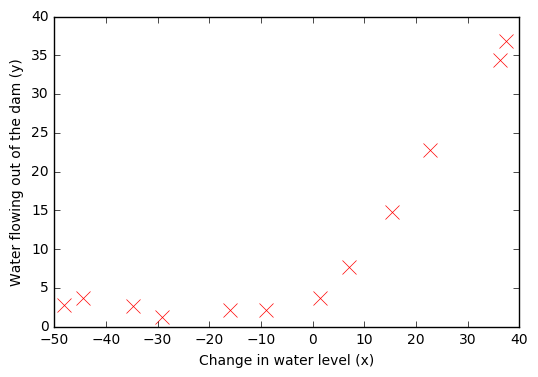

In [7]:
# Load Training Data
print('Loading and Visualizing Data ...\n')

loadInMatrix = lambda fileName, columns_number : np.loadtxt(fileName, delimiter =",").reshape(-1, columns_number) 

X = loadInMatrix(path_to_modules + 'train_features.csv', 1) 
y = loadInMatrix(path_to_modules + 'train_labels.csv', 1) 

Xval = loadInMatrix(path_to_modules + 'cross_validation_features.csv', 1)  
yval = loadInMatrix(path_to_modules + 'cross_validation_labels.csv', 1)  

Xtest = loadInMatrix(path_to_modules + 'test_features.csv', 1)  
ytest = loadInMatrix(path_to_modules + 'test_labels.csv', 1)  


# m = Number of examples
m = X.shape[0]

# Plot training data
training_data_plot = plt.plot(X, y, linestyle="None", color='red', marker='x', markersize=10, label="Training data")  
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')

plt.draw()
plt.show(block=False)

## Part 2: Regularized Linear Regression Cost 
 You should now implement the cost function for regularized linear 
  regression.

In [8]:
theta = np.array([[1], [1]])
new_input = np.c_[np.ones((m, 1)), X]
J, grad = linearRegCostFunction(new_input, y, theta, 1)

print('Cost at theta = [1 ; 1]: {} \n(this value should be about 303.993192)\n'.format(J))

Cost at theta = [1 ; 1]: 303.9950273879166 
(this value should be about 303.993192)



##  Part 3: Regularized Linear Regression Gradient
  You should now implement the gradient for regularized linear 
  regression.

In [9]:
print('Gradient at theta = [1 ; 1]:  [{}; {}] \n(this value should be about [-15.303016; 598.250744])\n'.format(grad[0], grad[1]))

Gradient at theta = [1 ; 1]:  [[-15.30294167]; [ 598.25651717]] 
(this value should be about [-15.303016; 598.250744])



##  Part 4: Train Linear Regression 
  Once you have implemented the cost and gradient correctly, the
  trainLinearReg function will use your cost function to train 
  regularized linear regression.
 
  Write Up Note: The data is non-linear, so this will not give a great 
                 fit.

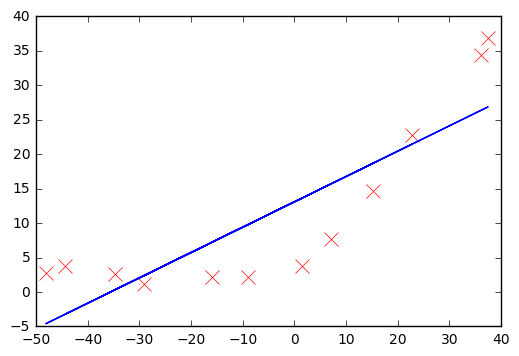

In [10]:
#  Train linear regression with lambda = 0
reg_lambda = 0
new_input = np.c_[np.ones((m, 1)), X]
theta = trainLinearReg(new_input, y, reg_lambda)

#  Plot fit over the data
p = new_input.dot(theta)
plt.plot(X, y, linestyle="None", color='red', marker='x', markersize=10)  
plt.plot(X, p, color='blue')
plt.draw()
plt.show(block=False)


##  Part 5: Learning Curve for Linear Regression 
  Next, you should implement the learningCurve function. 

  Write Up Note: Since the model is underfitting the data, we expect to
                 see a graph with "high bias" -- Figure 3 in ex5.pdf

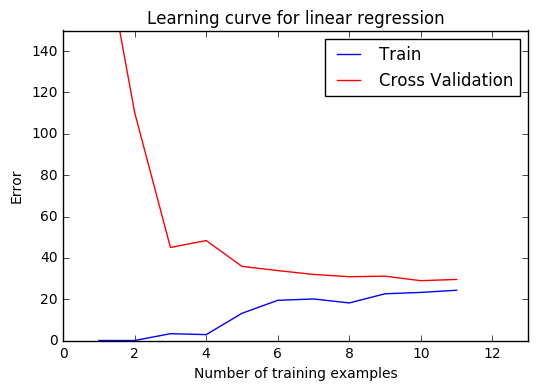

In [11]:
reg_lambda = 0
new__training_input = np.c_[np.ones((m, 1)), X]
new__validation_input = np.c_[np.ones((Xval.shape[0], 1)), Xval]

error_train, error_val = learningCurve(new__training_input, y, new__validation_input, yval, reg_lambda)

plt.figure(2) #new window
train_plot, = plt.plot(np.arange(1, m), error_train[1:m], linestyle='solid', color='blue',label="Train")
val_plot, = plt.plot(np.arange(1, m), error_val[1:m], linestyle='solid', color='red', label='Cross Validation')
plt.title('Learning curve for linear regression')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.legend(handles=[train_plot, val_plot])
plt.axis([0, 13, 0, 150])
plt.draw()
plt.show(block = False)

## Part 6: Feature Mapping for Polynomial Regression
  One solution to this is to use polynomial regression. You should now
  complete polyFeatures to map each example into its powers

In [12]:
p = 6

# Map X onto Polynomial Features (creating new features) and Normalize
X_poly = polyFeatures(X, p)
X_poly, mu, sigma = featureNormalize(X_poly)  # Normalize
X_poly = np.c_[np.ones((m, 1)), X_poly]                 # Add Ones

# Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = X_poly_test - mu
X_poly_test = X_poly_test / sigma
X_poly_test = np.c_[np.ones((X_poly_test.shape[0], 1)), X_poly_test]         # Add Ones

# Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p)
X_poly_val = X_poly_val - mu
X_poly_val = X_poly_val / sigma
X_poly_val = np.c_[np.ones((X_poly_val.shape[0], 1)), X_poly_val]          # Add Ones

print('Normalized Training Example 1:\n')
print(X_poly[0, :], '\n')


Normalized Training Example 1:

[ 1.         -0.37825174 -0.78865522  0.19032345 -0.73758686  0.32024972
 -0.61714833] 



##  Part 7: Learning Curve for Polynomial Regression 
  Now, you will get to experiment with polynomial regression with multiple
  values of lambda. The code below runs polynomial regression with 
  lambda = 0. You should try running the code with different values of
  lambda to see how the fit and learning curve change.

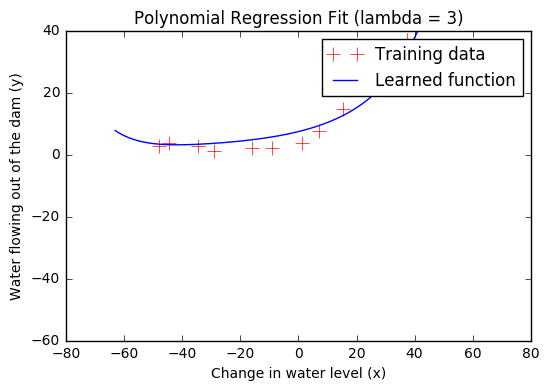

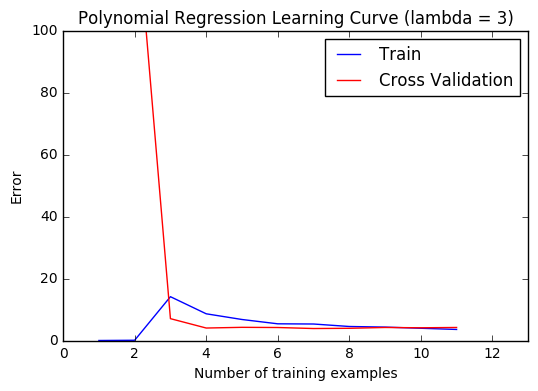

Polynomial Regression (lambda = 3)




In [13]:
reg_lambda = 3
theta = trainLinearReg(X_poly, y, reg_lambda)

# Plot training data and fit
plt.figure(3) #new window
training_data_plot, = plt.plot(X, y, color='red', marker='+', linestyle="None", markersize=10, label="Training data")  
fit_plot = plotFit(np.min(X), np.max(X), mu, sigma, theta, p, label="Learned function")
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title('Polynomial Regression Fit (lambda = {})'.format(reg_lambda))
plt.legend(handles=[training_data_plot, fit_plot])
plt.axis([-80, 80, -60, 40])
plt.draw()
plt.show(block=False)


plt.figure(4) #new window
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, reg_lambda)
train_plot, = plt.plot(np.arange(1, m), error_train[1:m], linestyle='solid', color='blue',label="Train")
val_plot, = plt.plot(np.arange(1, m), error_val[1:m], linestyle='solid', color='red', label='Cross Validation')
plt.title('Polynomial Regression Learning Curve (lambda = {})'.format(reg_lambda))
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0, 13, 0, 100])
plt.legend(handles=[train_plot, val_plot])
plt.draw()
plt.show(block=False)
print('Polynomial Regression (lambda = {})\n\n'.format(reg_lambda))

##  New Part ! : plot curves in function of polynomial degree 
  use this to select the  "best" polynomial degree value p.

../../algorithms_in_python/week_6/ex5\polyFeatures.py:9: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  X_poly = np.zeros((X.shape[0], p))
../../algorithms_in_python/week_6/ex5\polyFeatures.py:11: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  for j in range(1, p + 1):


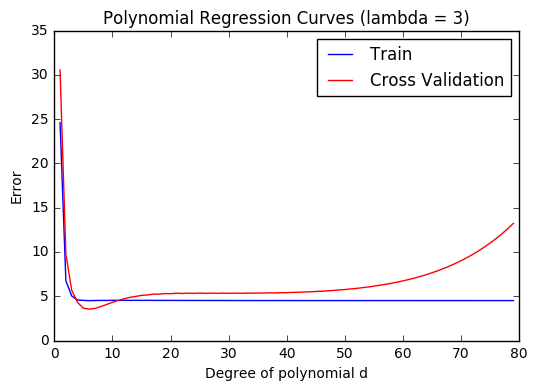

In [14]:
plt.figure(5) #new window
degrees, error_train, error_val = polynomialDegreeCurve(X, y, Xval , yval, reg_lambda)
train_plot, = plt.plot(degrees, error_train, linestyle='solid', color='blue',label="Train")
val_plot, = plt.plot(degrees, error_val, linestyle='solid', color='red', label='Cross Validation')
plt.title('Polynomial Regression Curves (lambda = {})'.format(reg_lambda))
plt.xlabel('Degree of polynomial d')
plt.ylabel('Error')
#plt.axis([0, 13, 0, 100])
plt.legend(handles=[train_plot, val_plot])
plt.draw()
plt.show(block=False)

##  Part 8: Validation for Selecting Lambda
  You will now implement validationCurve to test various values of 
  lambda on a validation set. You will then use this to select the
  "best" lambda value.

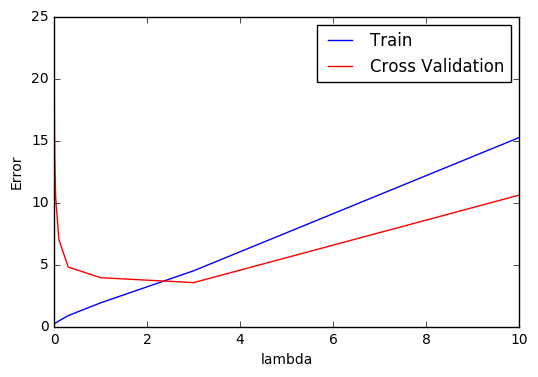


Training Set Accuracy:  94.2369925757 %



In [15]:
plt.figure(6) #new window
lambda_vec, error_train, error_val = validationCurve(X_poly, y, X_poly_val, yval)
train_plot, = plt.plot(lambda_vec, error_train, linestyle='solid', color='blue',label="Train")
val_plot, = plt.plot(lambda_vec, error_val, linestyle='solid', color='red', label='Cross Validation')
plt.xlabel('lambda')
plt.ylabel('Error')
plt.legend(handles=[train_plot, val_plot])
plt.axis([0, 10, 0, 25])
plt.draw()
plt.show(block=False)

prediction = X_poly.dot(theta).reshape(-1, 1)
print('\nTraining Set Accuracy: ', r2_score(y, prediction) * 100, '%\n')    